<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4662 non-null   object 
 1   High       4662 non-null   float64
 2   Low        4662 non-null   float64
 3   Open       4662 non-null   float64
 4   Close      4662 non-null   float64
 5   Adj Close  4662 non-null   float64
 6   count      4662 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.1+ KB


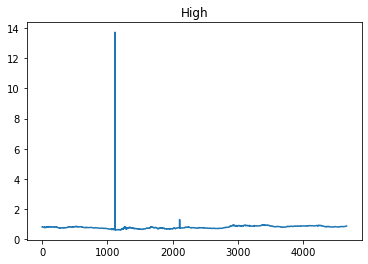

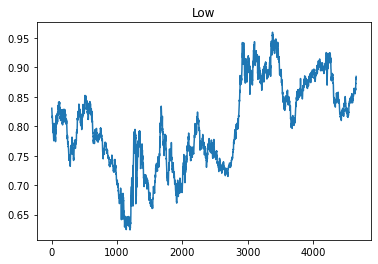

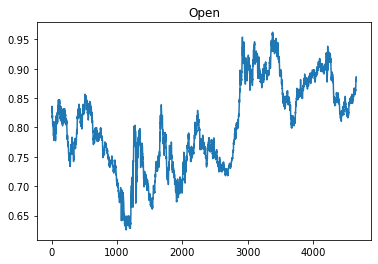

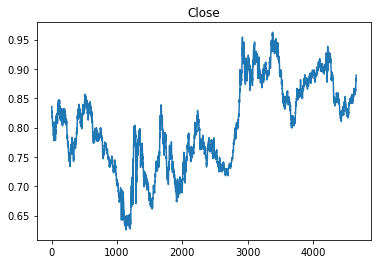

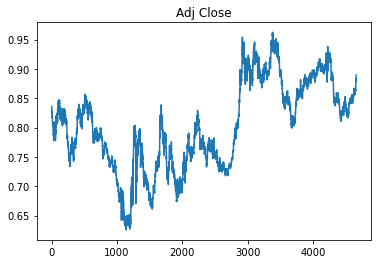

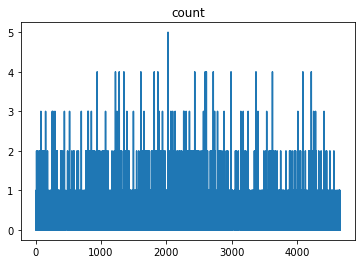

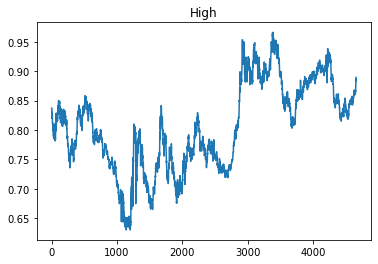

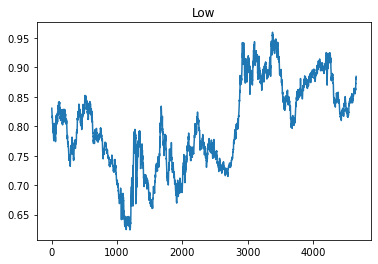

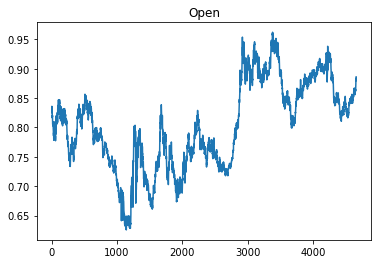

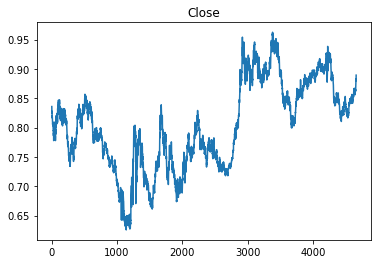

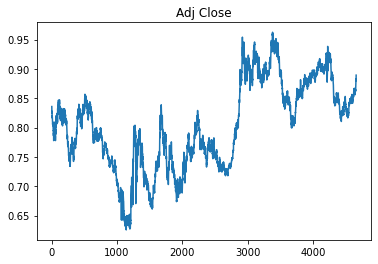

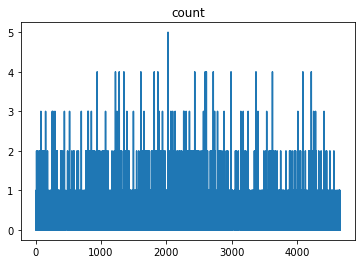

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data_collection/data.csv")


df.drop("Volume",1,inplace=True)

df.info()

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()
    

df.drop(df[df.High > 1].index, inplace=True)

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

### Data cleaning

In [2]:
dft = pd.read_csv("../data_collection/data_text.csv", index_col=0)

In [3]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1941 non-null   object
 1   years   1941 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [4]:
dft.head()

,text,years
0,PRESS RELEASE\nECB to redesign euro banknotes ...,6 December 2021
1,PRESS RELEASE\nSurvey on the Access to Finance...,24 November 2021
2,PRESS RELEASE\nEurosystem publishes new framew...,22 November 2021
3,PRESS RELEASE\nECB Financial Stability Review ...,17 November 2021
4,PRESS RELEASE\nECB appoints Doris Schneeberger...,12 November 2021


In [5]:
dft.text[0].split("\n")[0]

'PRESS RELEASE'

In [6]:
dft.text[0].split("\n")[1]

'ECB to redesign euro banknotes by 2024'

In [7]:
dft.text[0].split("\n")[2]

'6 December 2021'

In [8]:
dft.text[0].split("\n")[3:-9]

['ECB expects to select new euro banknote designs by 2024',
 'ECB to seek the opinion of the public',
 'Multidisciplinary group to advise Governing Council on new themes',
 'The European Central Bank (ECB) plans to redesign euro banknotes, working with European citizens in a process that is expected to lead to a final decision in 2024.',
 'The redesign process will start with the creation of focus groups, tasked with gathering opinions from people across the euro area on possible themes for the future euro banknotes. A theme advisory group with one expert from each euro area country will then submit a shortlist of new themes to the ECB’s Governing Council. The members of the advisory group have already been appointed by the ECB based on proposals from euro area national central banks, and are drawn from diverse fields such as history, natural and social sciences, the visual arts and technology. Current euro banknote designs are based on an “ages and styles” theme, represented by window

In [9]:
dft.text.apply(lambda x: x.split("\n")[3:-9])

0       [ECB expects to select new euro banknote desig...
1       [Improvement in availability of external finan...
2       [Framework assesses security and efficiency of...
3       [Near-term pandemic-related risks to financial...
4       [Doris Schneeberger to take up role on 1 Febru...
                              ...                        
1936    [This mission was undertaken as part of the re...
1937                                                   []
1938                                                   []
1939    [The Governing Council also decided on an allo...
1940    [As a result of the adoption of the euro by Gr...
Name: text, Length: 1941, dtype: object

In [10]:
dft.text[1940].split("\n")[2:-9]

['Yesterday, 1 January 2001, the euro was introduced in Greece. Greece has thus become the twelfth EU Member State to adopt the single currency and the first one to do so since the start of Stage Three of Economic and Monetary Union (EMU) on 1 January 1999. The European Central Bank (ECB) welcomes this first enlargement of the euro area.',
 "As a result of the adoption of the euro by Greece, the Bank of Greece is now a full member of the Eurosystem, with the same rights and obligations as the 11 national central banks of the other EU Member States that have adopted the euro. In particular, in accordance with Article 49 of the Statute of the European System of Central Banks and of the European Central Bank (Statute of the ESCB), the Bank of Greece today paid up the remainder of its contribution to the capital of the ECB, as well as its share of the ECB's reserves. In accordance with Article 49 of the Statute of the ESCB, the Bank of Greece also transferred to the ECB its contribution to

In [11]:
def clean_text_main(x):
    l = x.split("\n")
    if l[0] == "PRESS RELEASE":
        return " ".join(x.split("\n")[3:-9])
    else:
        return " ".join(x.split("\n")[2:-9])

In [12]:
clean_text_main(dft.text[1940])

"Yesterday, 1 January 2001, the euro was introduced in Greece. Greece has thus become the twelfth EU Member State to adopt the single currency and the first one to do so since the start of Stage Three of Economic and Monetary Union (EMU) on 1 January 1999. The European Central Bank (ECB) welcomes this first enlargement of the euro area. As a result of the adoption of the euro by Greece, the Bank of Greece is now a full member of the Eurosystem, with the same rights and obligations as the 11 national central banks of the other EU Member States that have adopted the euro. In particular, in accordance with Article 49 of the Statute of the European System of Central Banks and of the European Central Bank (Statute of the ESCB), the Bank of Greece today paid up the remainder of its contribution to the capital of the ECB, as well as its share of the ECB's reserves. In accordance with Article 49 of the Statute of the ESCB, the Bank of Greece also transferred to the ECB its contribution to the 

In [13]:
clean_text_main(dft.text[0])

'ECB expects to select new euro banknote designs by 2024 ECB to seek the opinion of the public Multidisciplinary group to advise Governing Council on new themes The European Central Bank (ECB) plans to redesign euro banknotes, working with European citizens in a process that is expected to lead to a final decision in 2024. The redesign process will start with the creation of focus groups, tasked with gathering opinions from people across the euro area on possible themes for the future euro banknotes. A theme advisory group with one expert from each euro area country will then submit a shortlist of new themes to the ECB’s Governing Council. The members of the advisory group have already been appointed by the ECB based on proposals from euro area national central banks, and are drawn from diverse fields such as history, natural and social sciences, the visual arts and technology. Current euro banknote designs are based on an “ages and styles” theme, represented by windows, doorways and b

In [14]:
dft["main_text"]= dft.text.apply(clean_text_main)

In [15]:
dft.head()

,text,years,main_text
0,PRESS RELEASE\nECB to redesign euro banknotes ...,6 December 2021,ECB expects to select new euro banknote design...
1,PRESS RELEASE\nSurvey on the Access to Finance...,24 November 2021,Improvement in availability of external financ...
2,PRESS RELEASE\nEurosystem publishes new framew...,22 November 2021,Framework assesses security and efficiency of ...
3,PRESS RELEASE\nECB Financial Stability Review ...,17 November 2021,Near-term pandemic-related risks to financial ...
4,PRESS RELEASE\nECB appoints Doris Schneeberger...,12 November 2021,Doris Schneeberger to take up role on 1 Februa...


In [16]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1941 non-null   object
 1   years      1941 non-null   object
 2   main_text  1941 non-null   object
dtypes: object(3)
memory usage: 125.2+ KB


In [17]:
def clean_text_title(x):
    l = x.split("\n")
    if l[0] == "PRESS RELEASE":
        return "".join(x.split("\n")[1])
    else:
        return "".join(x.split("\n")[0])

In [18]:
clean_text_title(dft.text[1940])

'Greece now a member of European Economic and Monetary Union'

In [19]:
clean_text_title(dft.text[0])

'ECB to redesign euro banknotes by 2024'

In [20]:
dft["title"]= dft.text.apply(clean_text_title)

In [21]:
dft.head()

,text,years,main_text,title
0,PRESS RELEASE\nECB to redesign euro banknotes ...,6 December 2021,ECB expects to select new euro banknote design...,ECB to redesign euro banknotes by 2024
1,PRESS RELEASE\nSurvey on the Access to Finance...,24 November 2021,Improvement in availability of external financ...,Survey on the Access to Finance of Enterprises...
2,PRESS RELEASE\nEurosystem publishes new framew...,22 November 2021,Framework assesses security and efficiency of ...,Eurosystem publishes new framework for oversee...
3,PRESS RELEASE\nECB Financial Stability Review ...,17 November 2021,Near-term pandemic-related risks to financial ...,ECB Financial Stability Review shows pandemic ...
4,PRESS RELEASE\nECB appoints Doris Schneeberger...,12 November 2021,Doris Schneeberger to take up role on 1 Februa...,ECB appoints Doris Schneeberger as Director Ba...


In [22]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1941 non-null   object
 1   years      1941 non-null   object
 2   main_text  1941 non-null   object
 3   title      1941 non-null   object
dtypes: object(4)
memory usage: 140.4+ KB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4660 non-null   object 
 1   High       4660 non-null   float64
 2   Low        4660 non-null   float64
 3   Open       4660 non-null   float64
 4   Close      4660 non-null   float64
 5   Adj Close  4660 non-null   float64
 6   count      4660 non-null   float64
dtypes: float64(6), object(1)
memory usage: 291.2+ KB


In [24]:
dft.years = pd.to_datetime(dft.years)
df.Date = pd.to_datetime(df.Date)

In [25]:
dfm = pd.merge(dft, df, left_on="years", right_on="Date")

In [26]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   text       1459 non-null   object        
 1   years      1459 non-null   datetime64[ns]
 2   main_text  1459 non-null   object        
 3   title      1459 non-null   object        
 4   Date       1459 non-null   datetime64[ns]
 5   High       1459 non-null   float64       
 6   Low        1459 non-null   float64       
 7   Open       1459 non-null   float64       
 8   Close      1459 non-null   float64       
 9   Adj Close  1459 non-null   float64       
 10  count      1459 non-null   float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 136.8+ KB


In [27]:
dfm.head()

,text,years,main_text,title,Date,High,Low,Open,Close,Adj Close,count
0,PRESS RELEASE\nEurosystem publishes new framew...,2021-11-22,Framework assesses security and efficiency of ...,Eurosystem publishes new framework for oversee...,2021-11-22,0.88950,0.884600,0.88610,0.8893,0.8893,0.0
1,PRESS RELEASE\nECB Financial Stability Review ...,2021-11-17,Near-term pandemic-related risks to financial ...,ECB Financial Stability Review shows pandemic ...,2021-11-17,0.88727,0.882301,0.88369,0.8833,0.8833,1.0
2,PRESS RELEASE\nECB appoints Doris Schneeberger...,2021-11-12,Doris Schneeberger to take up role on 1 Februa...,ECB appoints Doris Schneeberger as Director Ba...,2021-11-12,0.87458,0.872610,0.87353,0.8733,0.8733,1.0
3,PRESS RELEASE\nECB publishes consolidated bank...,2021-11-04,Total assets of EU-headquartered credit instit...,ECB publishes consolidated banking data for en...,2021-11-04,0.86736,0.860800,0.86090,0.8609,0.8609,1.0
4,PRESS RELEASE\nECB appoints Cornelia Holthause...,2021-11-02,Cornelia Holthausen to take up role on 1 Decem...,ECB appoints Cornelia Holthausen as Director G...,2021-11-02,0.86362,0.860956,0.86194,0.8621,0.8621,1.0


In [29]:
dfm["target"] = dfm.apply(lambda x: 1 if ( x.Close - x.Open) > 0 else 0, 1)

In [186]:
df2 = dfm[["main_text","Close","target"]]

In [187]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [188]:
sid.polarity_scores(dfm.main_text[0])

{'neg': 0.003, 'neu': 0.889, 'pos': 0.107, 'compound': 0.9904}

In [189]:
len(list(df2.itertuples())[0])

4

In [190]:

df2.dropna(inplace=True)

blanks = []  

for i,main,close,target in df2.itertuples():  
    if type(main)==str:            
        if main.isspace():      
            blanks.append(i)

<ipython-input-190-f69c1986a3bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [191]:
blanks

[]

In [192]:
df2['scores'] = df2['main_text'].apply(lambda x: sid.polarity_scores(x))

<ipython-input-192-8d2b78a8ff57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['scores'] = df2['main_text'].apply(lambda x: sid.polarity_scores(x))


In [193]:
df2.head()

,main_text,Close,target,scores
0,Framework assesses security and efficiency of ...,0.8893,1,"{'neg': 0.003, 'neu': 0.889, 'pos': 0.107, 'co..."
1,Near-term pandemic-related risks to financial ...,0.8833,0,"{'neg': 0.127, 'neu': 0.739, 'pos': 0.134, 'co..."
2,Doris Schneeberger to take up role on 1 Februa...,0.8733,0,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp..."
3,Total assets of EU-headquartered credit instit...,0.8609,0,"{'neg': 0.011, 'neu': 0.891, 'pos': 0.098, 'co..."
4,Cornelia Holthausen to take up role on 1 Decem...,0.8621,1,"{'neg': 0.013, 'neu': 0.906, 'pos': 0.082, 'co..."


In [194]:
df2['compound']  = df2['scores'].apply(lambda x: x['compound'])
df2['neg']  = df2['scores'].apply(lambda x: x['neg'])
df2['neu']  = df2['scores'].apply(lambda x: x['neu'])
df2['pos']  = df2['scores'].apply(lambda x: x['pos'])
df2.head()

<ipython-input-194-f1e5361a96ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['compound']  = df2['scores'].apply(lambda x: x['compound'])
<ipython-input-194-f1e5361a96ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['neg']  = df2['scores'].apply(lambda x: x['neg'])
<ipython-input-194-f1e5361a96ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,main_text,Close,target,scores,compound,neg,neu,pos
0,Framework assesses security and efficiency of ...,0.8893,1,"{'neg': 0.003, 'neu': 0.889, 'pos': 0.107, 'co...",0.9904,0.003,0.889,0.107
1,Near-term pandemic-related risks to financial ...,0.8833,0,"{'neg': 0.127, 'neu': 0.739, 'pos': 0.134, 'co...",0.6737,0.127,0.739,0.134
2,Doris Schneeberger to take up role on 1 Februa...,0.8733,0,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.9628,0.000,0.871,0.129
3,Total assets of EU-headquartered credit instit...,0.8609,0,"{'neg': 0.011, 'neu': 0.891, 'pos': 0.098, 'co...",0.9920,0.011,0.891,0.098
4,Cornelia Holthausen to take up role on 1 Decem...,0.8621,1,"{'neg': 0.013, 'neu': 0.906, 'pos': 0.082, 'co...",0.9705,0.013,0.906,0.082


In [195]:
df2.corr()

,Close,target,compound,neg,neu,pos
Close,1.000000,-0.040711,0.105599,0.127695,-0.185370,0.157344
target,-0.040711,1.000000,-0.040779,-0.016653,0.033404,-0.023229
compound,0.105599,-0.040779,1.000000,-0.338046,-0.165011,0.469919
neg,0.127695,-0.016653,-0.338046,1.000000,-0.603823,0.270594
neu,-0.185370,0.033404,-0.165011,-0.603823,1.000000,-0.797193
pos,0.157344,-0.023229,0.469919,0.270594,-0.797193,1.000000


In [197]:
#https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
from scipy.stats import pearsonr
import numpy as np
rho = df2[["Close","compound"]].corr()
pval = df2[["Close","compound"]].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,Close,compound
Close,1.0***,0.11***
compound,0.11***,1.0***


<AxesSubplot:ylabel='Frequency'>

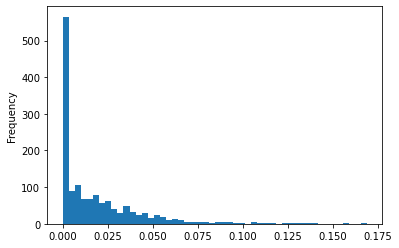

In [41]:
df2.neg.plot.hist(bins=50)

(0.6, 1.05)

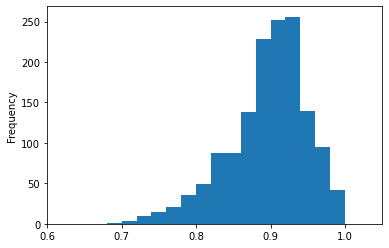

In [42]:
df2.neu.plot.hist(bins=50)
plt.xlim(0.6)

<AxesSubplot:ylabel='Frequency'>

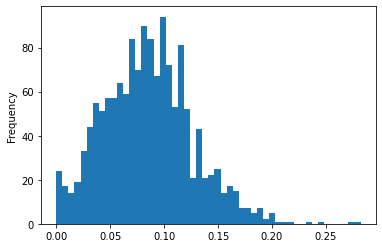

In [43]:
df2.pos.plot.hist(bins=50)


<AxesSubplot:ylabel='Frequency'>

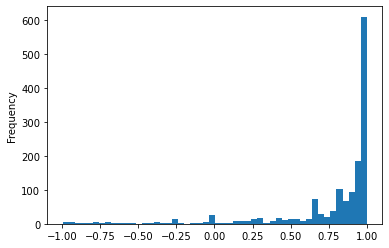

In [44]:
df2.compound.plot.hist(bins=50)

In [67]:
df2['comp_score'] = df2['compound'].apply(lambda c: 1 if c >=0 else 0)

<ipython-input-67-383af4116cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['comp_score'] = df2['compound'].apply(lambda c: 1 if c >=0 else 0)


In [68]:
pd.crosstab(df2.comp_score, df2.target)

target,0,1
comp_score,,
0,38,31
1,813,577


In [71]:
df2['pos_score'] = df2['pos'].apply(lambda c: 1 if c >=0.1 else 0)

In [72]:
pd.crosstab(df2.pos_score, df2.target)

target,0,1
pos_score,,
0,548,407
1,303,201


<AxesSubplot:ylabel='Frequency'>

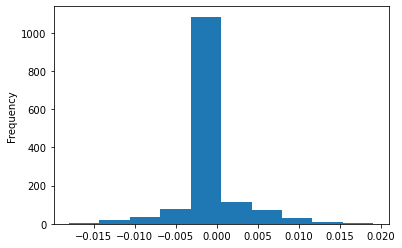

In [73]:
dfm.apply(lambda x: x.Close - x.Open,1).plot.hist()

In [92]:
-0.1

-0.1

In [179]:
df2["diff_bigger"] = dfm.apply(lambda x: 1 if (x.Close - x.Open) >0.0 else (0 if (x.Close - x.Open) <0.0 else np.NaN), 1)

<ipython-input-179-ecbce20d13cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["diff_bigger"] = dfm.apply(lambda x: 1 if (x.Close - x.Open) >0.0 else (0 if (x.Close - x.Open) <0.0 else np.NaN), 1)


In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   main_text    1459 non-null   object 
 1   Close        1459 non-null   float64
 2   target       1459 non-null   int64  
 3   scores       1459 non-null   object 
 4   compound     1459 non-null   float64
 5   neg          1459 non-null   float64
 6   neu          1459 non-null   float64
 7   pos          1459 non-null   float64
 8   diff_bigger  1328 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 114.0+ KB


In [182]:
df2.dropna()[["Close","target","compound"]].corr()

,Close,target,compound
Close,1.000000,-0.049829,0.107595
target,-0.049829,1.000000,-0.047604
compound,0.107595,-0.047604,1.000000


In [183]:
rho = df2.dropna()[["Close","target","compound"]].corr()
pval = df2.dropna()[["Close","target","compound"]].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,Close,target,compound
Close,1.0***,-0.05*,0.108***
target,-0.05*,1.0***,-0.048*
compound,0.108***,-0.048*,1.0***


In [184]:
df2["diff_bigger"] = dfm.apply(lambda x: 1 if (x.Close - x.Open) >0.001 else (0 if (x.Close - x.Open) <0.001 else np.NaN), 1)

<ipython-input-184-c5e17d34145d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["diff_bigger"] = dfm.apply(lambda x: 1 if (x.Close - x.Open) >0.001 else (0 if (x.Close - x.Open) <0.001 else np.NaN), 1)


In [185]:
rho = df2.dropna()[["Close","target","compound"]].corr()
pval = df2.dropna()[["Close","target","compound"]].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,Close,target,compound
Close,1.0***,-0.041,0.106***
target,-0.041,1.0***,-0.041
compound,0.106***,-0.041,1.0***
